In [58]:
import numpy as np
import pandas as pd

In [59]:
prices = pd.DataFrame({'Blue':[8.70,8.91,8.71,8.43,8.73],
                       'Orange':[10.66,11.88,10.71,11.59,12.11]})
prices

,Blue,Orange
0,8.70,10.66
1,8.91,11.88
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [60]:
#now getting the return =  (P1/P0)-1
prices.iloc[1:].values/prices.iloc[:-1].values-1

array([[ 0.02413793,  0.11444653],
       [-0.02244669, -0.09848485],
       [-0.03214696,  0.0821662 ],
       [ 0.03558719,  0.04486626]])

In [61]:
prices/prices.shift(1) -1  #another way

,Blue,Orange
0,NaN,NaN
1,0.024138,0.114447
2,-0.022447,-0.098485
3,-0.032147,0.082166
4,0.035587,0.044866


In [62]:
prices.pct_change()   #another way only getting the percentage chage

,Blue,Orange
0,NaN,NaN
1,0.024138,0.114447
2,-0.022447,-0.098485
3,-0.032147,0.082166
4,0.035587,0.044866


In [63]:
prices = pd.read_csv('data/sample_prices.csv')
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [64]:
returns = prices.pct_change()

<AxesSubplot: >

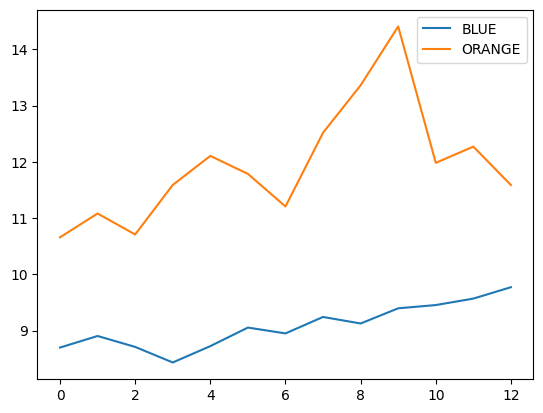

In [65]:
prices.plot()

<AxesSubplot: >

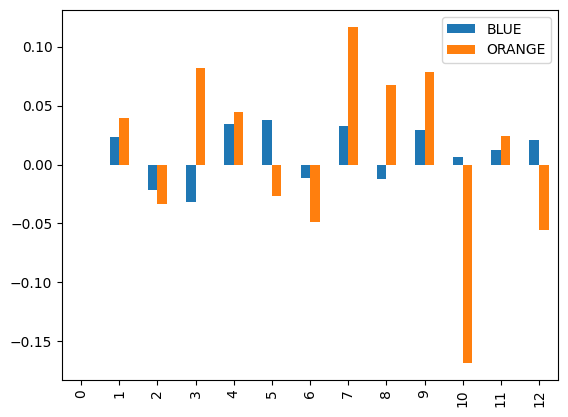

In [66]:
%matplotlib inline
returns.plot.bar()

In [67]:
returns.head()

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544


In [68]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [69]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [70]:
np.prod(returns+1)-1     #it added 1 with each data then multiply them with each column, this is how compunding return can get
#compunding return = (1+R1)(1+R2)-1; for two return

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [71]:
#another way
(returns+1).prod()-1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

### Annualization

In [72]:
rm=0.01    #monthly return
(1+rm)**12-1

0.12682503013196977

In [73]:
rq = 0.04   #quarterly return
(1+rq)**4 -1

0.1698585600000002

In [74]:
returns= returns.dropna()
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


std(), ei function ta sample er std bair kore (N-1 denominator e kaj kore)
manually std ber korle oita population er std ber kore jekhane N denominator hishebe kaj kore

In [75]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [76]:
dev = returns-returns.mean()
sq_dev = dev**2
var=sq_dev.mean()
volatility=np.sqrt(var)
volatility   #look these two values are not same like the before two's for this reason

BLUE      0.022957
ORANGE    0.076212
dtype: float64

In [77]:
## we are fixing this
no_of_obs = returns.shape[0]    #this will return the number of row of the matrix
var = sq_dev.sum()/(no_of_obs-1)
volatility=var**0.5   #now this will execute same result
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [78]:
ann_vola = returns.std()*(12**0.5)
ann_vola

BLUE      0.083060
ORANGE    0.275747
dtype: float64

lets work with larger data

In [79]:
returns = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv', header=0, index_col=0, parse_dates=True,na_values=-99.99)
returns.head(3)

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67


In [80]:
columns=["Lo 10","Hi 10"]
returns = returns[columns]
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [81]:
returns=returns/100
returns.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [82]:
returns.columns=["SmallCap","LargeCap"]
returns.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


<AxesSubplot: >

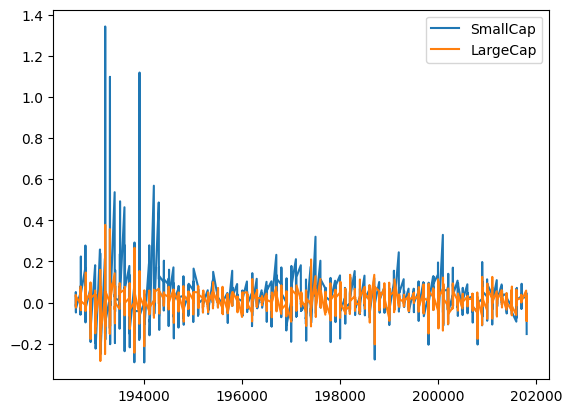

In [83]:
returns.plot.line()

In [84]:
returns.std()

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

In [85]:
ann_vola= returns.std()*np.sqrt(12)
ann_vola

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [86]:
no_of_month = returns.shape[0]
return_per_month = (returns+1).prod()**(1/no_of_month) - 1
return_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [87]:
ann_vola

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [88]:
ann_return = (return_per_month+1)**12 -1
ann_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [89]:
## another way
ann_return = (returns+1).prod()**(12/no_of_month) -1
ann_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [90]:
ann_return/ann_vola    #retuurn on risk ratio

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

In [91]:
risk_free_rate = 0.03
excess_return = ann_return - risk_free_rate
sharp_ratio = excess_return/ann_vola
sharp_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64

<AxesSubplot: >

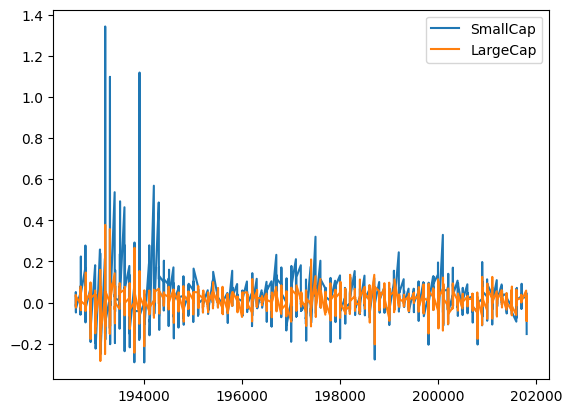

In [92]:
returns.plot.line()

In [93]:
returns.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [94]:
returns.index= pd.to_datetime(returns.index, format='%Y%m')
returns.head()

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [95]:
returns.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [96]:
returns.index= returns.index.to_period('M')
returns.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [97]:
returns.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110)

# Compute Drawdowns
1. Compute a Wealth index
2. Compute previous peaks
3. Compute drawdown - which is the wealth value as a percentage of previous peak

In [98]:
wealth_index =  1000*(1+returns["LargeCap"]).cumprod()     #cumilitive product
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

<AxesSubplot: >

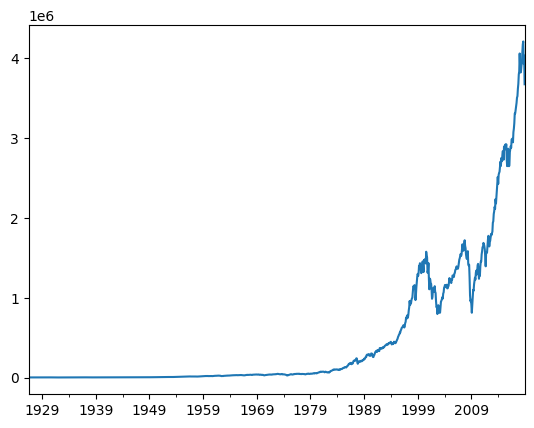

In [99]:
wealth_index.plot.line()

<AxesSubplot: >

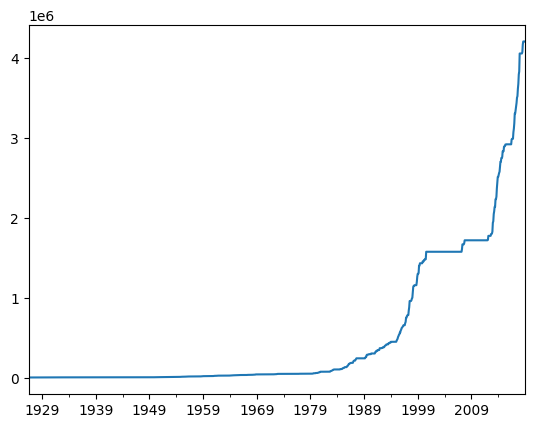

In [100]:
previous_peaks=wealth_index.cummax()    #cumilitive max
previous_peaks.plot()

<AxesSubplot: >

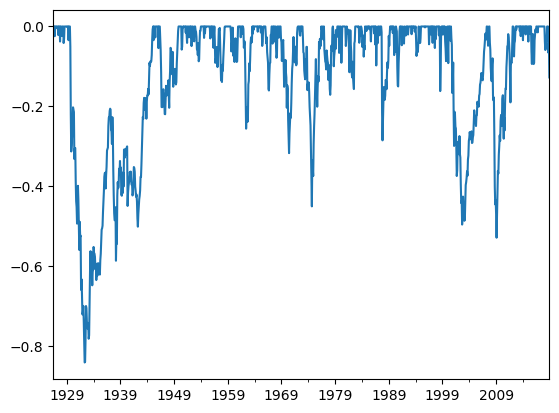

In [101]:
drawdown = (wealth_index-previous_peaks)/previous_peaks
drawdown.plot()

In [102]:
drawdown.min()

-0.8400375277943123

In [103]:
drawdown["1975":].idxmin()

Period('2009-02', 'M')

In [104]:
def drawdown (return_series: pd.Series): 
    """
    Takes a time series of asset returns
    Computes and returns a Dataframe that contains:
    the wealth index
    the previous peaks
    percent drawdowns
    """
    wealth_index=1000*(1+return_series).cumprod()
    previous_peaks= wealth_index.cummax()
    drawdown = (wealth_index-previous_peaks)/previous_peaks
    return pd.DataFrame ({
        'Wealth': wealth_index,
        'Peaks':previous_peaks,
        'Drawdown':drawdown
    })
drawdown(returns['LargeCap']).head()

,Wealth,Peaks,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [105]:
drawdown(returns['LargeCap'])[["Wealth","Peaks"]].head()

,Wealth,Peaks
1926-07,1032.900000,1032.900000
1926-08,1071.117300,1071.117300
1926-09,1078.293786,1078.293786
1926-10,1052.091247,1078.293786
1926-11,1080.497711,1080.497711


<AxesSubplot: >

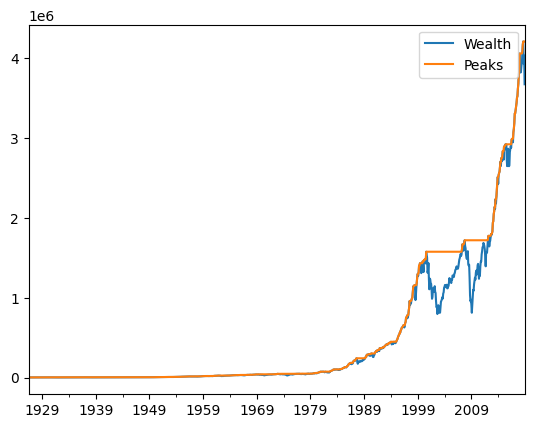

In [106]:
drawdown(returns['LargeCap'])[["Wealth","Peaks"]].plot()

<AxesSubplot: >

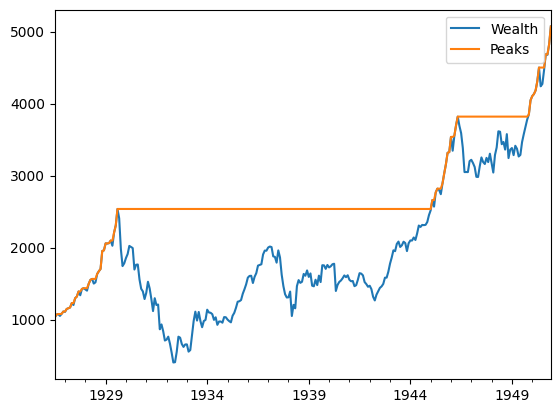

In [107]:
drawdown(returns[:"1950"]['LargeCap'])[["Wealth","Peaks"]].plot()

<AxesSubplot: >

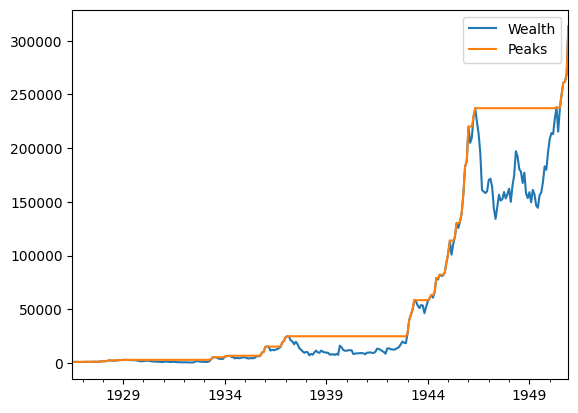

In [108]:
drawdown(returns[:"1950"]['SmallCap'])[["Wealth","Peaks"]].plot()

In [109]:
drawdown(returns[:"1950"]['SmallCap'])[["Drawdown"]].min()

Drawdown   -0.833001
dtype: float64

In [110]:
drawdown(returns[:"1950"]['SmallCap'])[["Drawdown"]].idxmin()

Drawdown    1932-05
dtype: period[M]

In [111]:
%load_ext autoreload
%autoreload 2
import edhec_risk_kit as erk
returns1=erk.get_ffme_returns()
returns1.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [112]:
erk.drawdown(returns['SmallCap'])['Drawdown'].min()

-0.8330007793945303

In [113]:
erk.drawdown(returns['1975':]['SmallCap'])['Drawdown'].min()

-0.6312068077252386